<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#Make-an-ExpressionSet-object" data-toc-modified-id="Make-an-ExpressionSet-object-4.1">Make an ExpressionSet object</a></span></li><li><span><a href="#Log2-transform-and-save" data-toc-modified-id="Log2-transform-and-save-4.2">Log2 transform and save</a></span></li><li><span><a href="#Batch-correct-log2-tpms" data-toc-modified-id="Batch-correct-log2-tpms-4.3">Batch correct log2 tpms</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
library(sva)
library(Biobase)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-33. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames

# Functions

In [1]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/plotting_functions.R")

# Paths

In [2]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [5]:
load(paste0(datapath,"exp_mat/tpm_matrix_ped_final.RData"))

In [6]:
load(file = paste0(datapath, "ESTIMATE/estimate_manifest_primary_clean_final.RData"))

In [7]:
estimate_manifest_primary_clean <- estimate_manifest_primary_clean[ estimate_manifest_primary_clean$group != "TCGA",]

In [8]:
table(estimate_manifest_primary_clean$group)


  CBTN   ICGC TARGET 
   581    196    149 

In [9]:
dim(estimate_manifest_primary_clean)

[1] 926  23

In [10]:
dim(tpm_matrix_ped_final)

[1] 20105   925

In [11]:
tpm_matrix_ped <- tpm_matrix_ped_final[, colnames(tpm_matrix_ped_final) %in% estimate_manifest_primary_clean$sample_id]

In [12]:
head(tpm_matrix_ped)

,7316-1926,7316-489,7316-13,7316-3936,7316-873,7316-2669,7316-1928,7316-1655,7316-2622,7316-2893,⋯,ICGC_PA89,ICGC_PA9,ICGC_PA91,ICGC_PA92,ICGC_PA93,ICGC_PA94,ICGC_PA95,ICGC_PA96,ICGC_PA97,ICGC_PA99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,8.66,6.15,0.73,1.50,29.41,4.62,6.65,1.78,0.82,2.87,⋯,10.59,13.17,5.95,7.56,12.42,11.44,12.69,9.92,12.44,10.51
TNMD,0.02,0.03,0.02,0.01,0.33,0.03,0.07,0.01,0.00,0.00,⋯,0.05,0.01,0.09,0.03,0.04,0.06,0.13,0.02,0.07,0.03
DPM1,6.15,5.09,1.09,3.68,4.89,4.75,3.07,4.58,0.78,3.27,⋯,5.83,3.99,4.26,4.41,4.03,4.62,6.50,6.17,6.01,5.47
SCYL3,1.75,1.71,0.44,1.44,1.52,1.61,1.01,1.18,0.13,1.39,⋯,1.88,1.11,1.27,1.33,1.41,1.73,1.81,1.81,2.19,1.83
C1orf112,1.12,2.78,0.43,0.71,1.00,1.64,0.58,1.61,0.25,1.57,⋯,0.68,1.02,0.91,0.63,1.05,1.06,1.38,1.19,1.10,1.37
FGR,0.90,0.18,0.36,1.32,0.93,1.01,0.83,0.09,0.40,1.03,⋯,0.58,0.45,0.54,0.55,0.72,0.48,0.41,0.88,1.22,0.65


## Make an ExpressionSet object

In [13]:
metadata <- estimate_manifest_primary_clean

In [14]:
metadata$sample_id[!metadata$sample_id %in% colnames(tpm_matrix_ped)]

[1] "H049-SPP6"

In [15]:
metadata <- metadata[metadata$sample_id %in% colnames(tpm_matrix_ped),]

The sample above is not available in hg38

In [16]:
rownames(metadata) <- metadata$sample_id

In [17]:
varData <- new("AnnotatedDataFrame", data = metadata)

In [18]:
dim(metadata)

[1] 925  23

In [19]:
head(tpm_matrix_ped)

,7316-1926,7316-489,7316-13,7316-3936,7316-873,7316-2669,7316-1928,7316-1655,7316-2622,7316-2893,⋯,ICGC_PA89,ICGC_PA9,ICGC_PA91,ICGC_PA92,ICGC_PA93,ICGC_PA94,ICGC_PA95,ICGC_PA96,ICGC_PA97,ICGC_PA99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,8.66,6.15,0.73,1.50,29.41,4.62,6.65,1.78,0.82,2.87,⋯,10.59,13.17,5.95,7.56,12.42,11.44,12.69,9.92,12.44,10.51
TNMD,0.02,0.03,0.02,0.01,0.33,0.03,0.07,0.01,0.00,0.00,⋯,0.05,0.01,0.09,0.03,0.04,0.06,0.13,0.02,0.07,0.03
DPM1,6.15,5.09,1.09,3.68,4.89,4.75,3.07,4.58,0.78,3.27,⋯,5.83,3.99,4.26,4.41,4.03,4.62,6.50,6.17,6.01,5.47
SCYL3,1.75,1.71,0.44,1.44,1.52,1.61,1.01,1.18,0.13,1.39,⋯,1.88,1.11,1.27,1.33,1.41,1.73,1.81,1.81,2.19,1.83
C1orf112,1.12,2.78,0.43,0.71,1.00,1.64,0.58,1.61,0.25,1.57,⋯,0.68,1.02,0.91,0.63,1.05,1.06,1.38,1.19,1.10,1.37
FGR,0.90,0.18,0.36,1.32,0.93,1.01,0.83,0.09,0.40,1.03,⋯,0.58,0.45,0.54,0.55,0.72,0.48,0.41,0.88,1.22,0.65


In [20]:
tpm_matrix_ped <- as.matrix(tpm_matrix_ped[,rownames(metadata)])

In [21]:
IPD_Set <- new("ExpressionSet", exprs = tpm_matrix_ped, phenoData = varData)

In [22]:
IPD_Set

ExpressionSet (storageMode: lockedEnvironment)
assayData: 20105 features, 925 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: TARGET-30-PAIFXV-01A TARGET-30-PAIPGU-01A ... ICGC_PA99
    (925 total)
  varLabels: aliquot_id StromalScore ... CRI_cluster (23 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [23]:
save(IPD_Set, file = paste0(datapath, "exp_mat/IPD_ExprSet.RData"))

## Log2 transform and save

In [24]:
tpm_matrix_ped_log2 <- log2(tpm_matrix_ped+1)

In [25]:
IPD_Set_log2 <- new("ExpressionSet", exprs = tpm_matrix_ped_log2, phenoData = varData)

In [26]:
IPD_Set_log2

ExpressionSet (storageMode: lockedEnvironment)
assayData: 20105 features, 925 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: TARGET-30-PAIFXV-01A TARGET-30-PAIPGU-01A ... ICGC_PA99
    (925 total)
  varLabels: aliquot_id StromalScore ... CRI_cluster (23 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [27]:
save(IPD_Set_log2, file = paste0(datapath, "exp_mat/IPD_ExprSet_log2.RData"))

## Batch correct log2 tpms

In [28]:
vars <- pData(IPD_Set_log2)
tpms <- exprs(IPD_Set_log2)

In [29]:
head(vars)

,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,sample_id,gender,ethnicity,race,⋯,days_to_progress,recurrence,disease_type,primary_site,group,cohort,sample_type,age_class,tumour_subtype,CRI_cluster
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
TARGET-30-PAIFXV-01A,TARGET-30-PAIFXV-01A-01R,-537.97880,483.8556,-54.1232,af82838c-9071-4dd7-8766-b818cf61cf82.bam,TARGET-30-PAIFXV,TARGET-30-PAIFXV-01A,Female,Unknown,White,⋯,1675,1,MB_GR34,Abdomen,TARGET,NBL,Primary Tumor,Children,NBL_MYCNA,NA
TARGET-30-PAIPGU-01A,TARGET-30-PAIPGU-01A-01R,-319.22630,1240.6492,921.4229,b1d954e7-21a0-441e-a9c7-47e6a6454625.bam,TARGET-30-PAIPGU,TARGET-30-PAIPGU-01A,Female,Unknown,White,⋯,1976,0,MB_GR34,Adrenal gland,TARGET,NBL,Primary Tumor,NA,NBL_MYCNA,1
TARGET-30-PAISNS-01A,TARGET-30-PAISNS-01A-01R,-899.30090,-128.2337,-1027.5347,7e145f1d-1807-4615-95b5-2684ccbcb348.bam,TARGET-30-PAISNS,TARGET-30-PAISNS-01A,Male,Unknown,White,⋯,2829,0,MB_GR34,Abdomen,TARGET,NBL,Primary Tumor,NA,NBL_MYCNA,1
TARGET-30-PAITCI-01A,TARGET-30-PAITCI-01A-01R,-327.26820,200.6735,-126.5947,9704403e-aaf9-4a97-99bc-b2a9a9861767.bam,TARGET-30-PAITCI,TARGET-30-PAITCI-01A,Male,Unknown,White,⋯,201,1,MB_GR34,Adrenal gland,TARGET,NBL,Primary Tumor,Infants,NBL_MYCNA,1
TARGET-30-PAIVHE-01A,TARGET-30-PAIVHE-01A-01R,-15.87499,1033.6469,1017.7719,d8d30bd7-608d-4cbd-ba31-3f1fa6fefacf.bam,TARGET-30-PAIVHE,TARGET-30-PAIVHE-01A,Male,not hispanic or latino,White,⋯,709,1,MB_GR34,Adrenal gland,TARGET,NBL,Primary Tumor,Children,NBL_MYCNA,2
TARGET-30-PAIXIF-01A,TARGET-30-PAIXIF-01A-01R,460.15050,978.1672,1438.3177,7c2b0108-1231-4543-a8bf-eb6644e76f41.bam,TARGET-30-PAIXIF,TARGET-30-PAIXIF-01A,Male,Unknown,Unknown,⋯,302,1,MB_GR34,Retroperitoneum,TARGET,NBL,Primary Tumor,Children,NBL_MYCNA,NA


In [30]:
tpms[1:10,1:10]

,TARGET-30-PAIFXV-01A,TARGET-30-PAIPGU-01A,TARGET-30-PAISNS-01A,TARGET-30-PAITCI-01A,TARGET-30-PAIVHE-01A,TARGET-30-PAIXIF-01A,TARGET-30-PAKYZS-01A,TARGET-30-PAKZRH-01A,TARGET-30-PALBFW-01A,TARGET-30-PALCBW-01A
TSPAN6,3.6519127,3.3419857,5.024586,3.9560567,6.075105,4.348374,3.755956,4.2861419,4.1399606,4.4705369
TNMD,0.1375035,0.1110313,0.000000,0.0000000,0.000000,0.000000,0.000000,0.2265085,0.2265085,0.2509616
DPM1,4.5533605,5.0426443,5.512543,6.4711875,5.212180,4.612942,4.821200,5.4604149,5.0487593,4.6501901
SCYL3,1.7527486,1.4750849,2.253989,1.8032270,2.563158,2.000000,2.077243,2.2750070,2.7026575,2.7398481
C1orf112,1.2986583,2.0426443,3.190615,2.2326608,2.969012,2.613532,1.682573,2.3074285,2.0635029,1.7782086
FGR,1.6088092,2.5109619,1.978196,0.8797058,2.916477,1.863938,1.622930,1.3219281,2.2387869,2.8914192
CFH,3.4316230,3.2764967,4.438293,4.6252705,5.246408,5.881420,4.766595,3.5147535,5.0430820,6.7141081
FUCA2,3.9326282,3.6780719,3.407353,3.8649290,4.297925,4.537917,4.624686,4.5837598,4.1578522,5.4322913
GCLC,2.7591558,2.4382929,2.386811,2.9429836,3.822730,1.815575,3.427606,2.9411063,3.9634741,3.4659745
NFYA,2.5285713,3.2016339,3.880686,2.8875253,3.388190,2.536053,2.570463,2.8399596,3.1715271,3.3812834


In [31]:
mod <- model.matrix(~1, data= vars)

combat_ped <- ComBat(dat = tpms, batch= vars$group, mod= mod,
                        par.prior=TRUE, prior.plots=FALSE)

Found 506 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found3batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





  CBTN   ICGC TARGET 
   581    195    149 


Using group as id variables



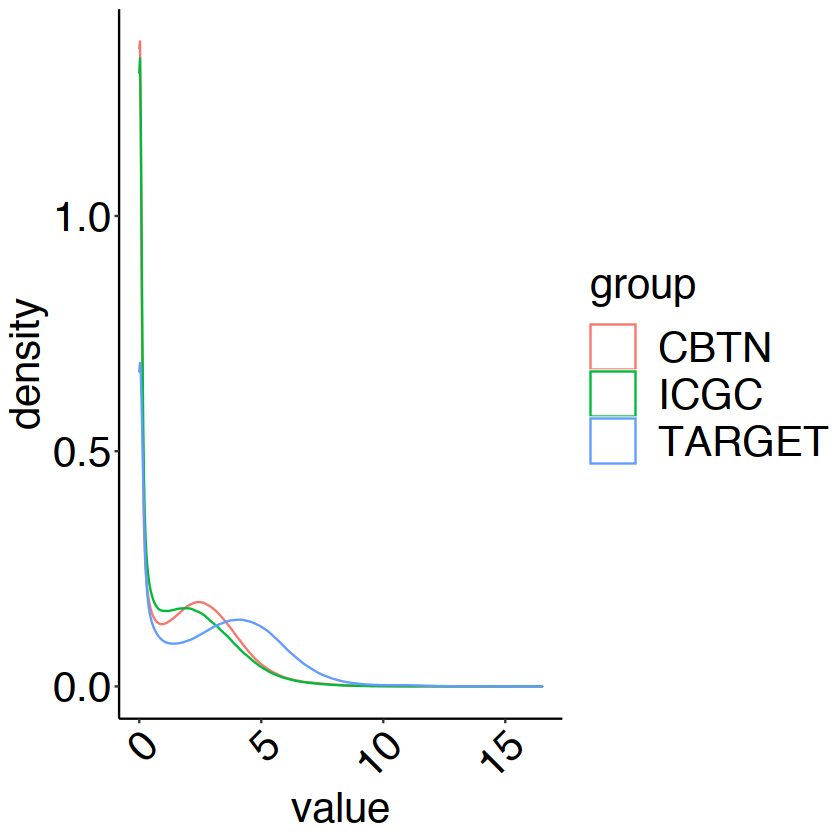

In [32]:
densplot.fx(tpms, vars)


  CBTN   ICGC TARGET 
   581    195    149 


Using group as id variables



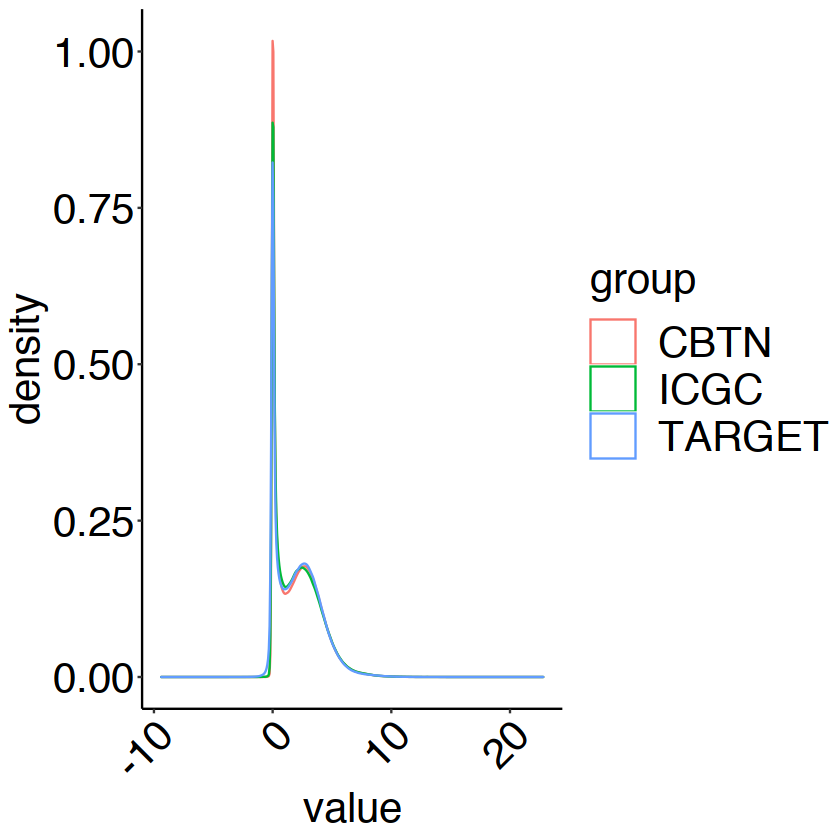

In [33]:
densplot.fx(combat_ped, vars)

In [34]:
IPD_Set_log2_combat <- new("ExpressionSet", exprs = combat_ped, phenoData = varData)

In [35]:
save(IPD_Set_log2_combat, file = paste0(datapath, "exp_mat/IPD_ExprSet_log2_combat.RData"))